# Project 2: Spatiotemporal Analysis of Chicago’s Bike Service

## Introduction

### Project Overview
This analysis investigates the usage patterns of the **Divvy Bike Sharing System** in **Downtown Chicago** from 2014 to 2017. The study leverages **spatiotemporal data** to explore ridership trends, station utilization, and the impact of external factors such as **weather conditions** and **user demographics**.

### Research Objectives
The goal of this project is to extract insights that can help **optimize bike-sharing operations**, **enhance user experience**, and **inform urban planning decisions**. The main research questions include:

1. **Temporal Trends:** How does bike usage fluctuate across hours, days, weeks, and months?
2. **Weather Effects:** How do different weather conditions impact trip counts?
3. **Station Demand:** Which stations experience high or low demand over time?
4. **User Behavior:** How do user attributes (e.g., gender, user type) influence trip duration and station choices?
5. **Efficiency Analysis:** How do station docking capacities affect ridership trends and bottlenecks?

### Dataset Description
The dataset consists of **9,495,235 records** spanning **four years (2014-2017)**. Key features include:

- **Trip attributes:** `tripduration`, `starttime`, `stoptime`
- **Spatial attributes:** `from_station_name`, `to_station_name`, `latitude_start`, `longitude_start`, `latitude_end`, `longitude_end`
- **Temporal attributes:** `year`, `month`, `week`, `day`, `hour`
- **User attributes:** `usertype` (subscriber/customer), `gender`
- **Weather attributes:** `events` (clear, cloudy, rain/snow, thunderstorm)

### Analysis Approach
- **Temporal Analysis:** Examining trip frequencies over different time scales (hours, days, weeks, months) to identify usage trends.
- **Spatial Analysis:** Mapping station utilization and detecting high-demand areas.
- **Spatiotemporal Modeling:** Identifying bottlenecks in bike distribution based on station capacity and ridership trends.

The findings from this analysis will help **optimize bike redistribution strategies** and **improve station capacity planning**.

---


In [2]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Mapping imports
import folium as fm
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

# Load data
filepath = "archive/data.csv"
bike_df = pd.read_csv(filepath)

In [3]:
bike_df.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,...,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,...,282,Halsted St & Maxwell St,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,...,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,...,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,194,State St & Wacker Dr,41.887155,-87.627750,11.0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,...,320,Loomis St & Lexington St,41.872187,-87.661501,15.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0


In [4]:
# Check the basic structure and data types
# print(bike_df.info())

# Summary statistics
bike_df.describe()

,trip_id,year,month,week,day,hour,tripduration,temperature,from_station_id,latitude_start,longitude_start,dpcapacity_start,to_station_id,latitude_end,longitude_end,dpcapacity_end
count,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06
mean,9.861173e+06,2.015737e+03,7.161242e+00,2.938068e+01,2.687387e+00,1.362471e+01,1.144686e+01,6.299990e+01,1.799215e+02,4.190017e+01,-8.764473e+01,2.138426e+01,1.807048e+02,4.190069e+01,-8.764496e+01,2.128447e+01
std,4.680018e+06,1.075629e+00,2.708379e+00,1.177941e+01,1.890345e+00,4.858830e+00,7.206061e+00,1.720086e+01,1.217041e+02,3.467450e-02,2.175210e-02,7.644496e+00,1.221144e+02,3.494946e-02,2.181374e-02,7.595932e+00
min,1.109427e+06,2.014000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-1.500000e+01,2.000000e+00,4.173665e+01,-8.780287e+01,0.000000e+00,2.000000e+00,4.173665e+01,-8.780287e+01,0.000000e+00
25%,5.941660e+06,2.015000e+03,5.000000e+00,2.100000e+01,1.000000e+00,9.000000e+00,6.033333e+00,5.200000e+01,7.700000e+01,4.188103e+01,-8.765479e+01,1.500000e+01,7.700000e+01,4.188132e+01,-8.765549e+01,1.500000e+01
50%,1.005810e+07,2.016000e+03,7.000000e+00,3.000000e+01,3.000000e+00,1.500000e+01,9.633333e+00,6.690000e+01,1.640000e+02,4.189228e+01,-8.764107e+01,1.900000e+01,1.640000e+02,4.189384e+01,-8.764109e+01,1.900000e+01
75%,1.383260e+07,2.017000e+03,9.000000e+00,3.800000e+01,4.000000e+00,1.700000e+01,1.520000e+01,7.590000e+01,2.680000e+02,4.192008e+01,-8.763058e+01,2.300000e+01,2.730000e+02,4.192169e+01,-8.763058e+01,2.300000e+01
max,1.753670e+07,2.017000e+03,1.200000e+01,5.300000e+01,6.000000e+00,2.300000e+01,6.000000e+01,9.500000e+01,6.260000e+02,4.206431e+01,-8.754939e+01,5.500000e+01,6.260000e+02,4.206431e+01,-8.754939e+01,5.500000e+01


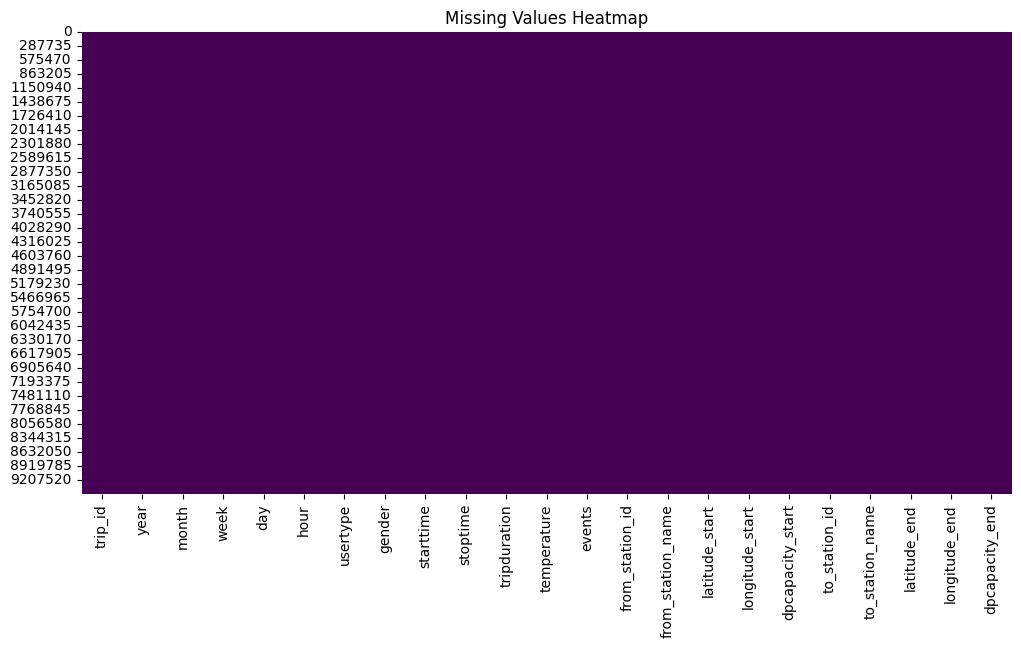

In [27]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(bike_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [31]:
# Check for erroneous values (e.g., negative values in columns where they don't make sense)
print(bike_df[bike_df['dpcapacity_end'] < 0])

Empty DataFrame
Columns: [trip_id, year, month, week, day, hour, usertype, gender, starttime, stoptime, tripduration, temperature, events, from_station_id, from_station_name, latitude_start, longitude_start, dpcapacity_start, to_station_id, to_station_name, latitude_end, longitude_end, dpcapacity_end]
Index: []

[0 rows x 23 columns]


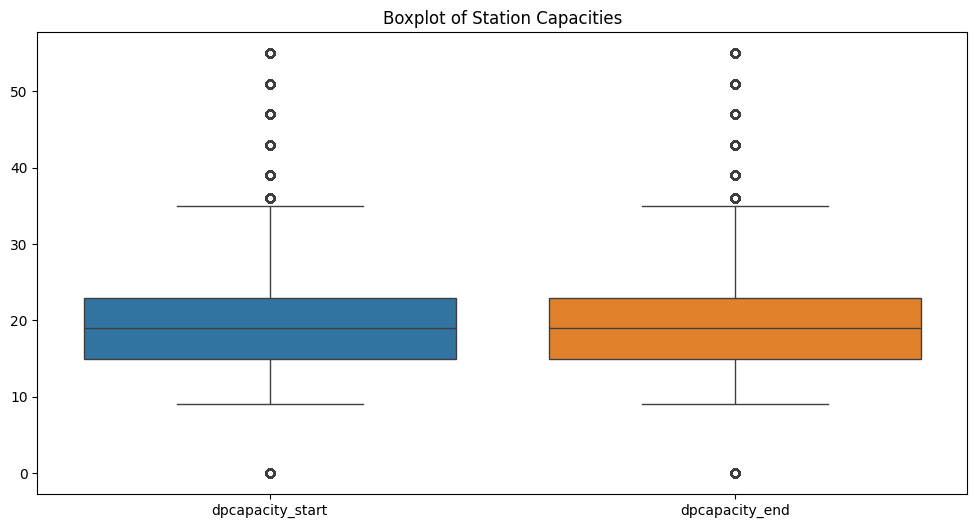

In [6]:
# Visualize outliers using boxplots for 'dpcapacity_start' and 'dpcapacity_end'
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_df[['dpcapacity_start', 'dpcapacity_end']])
plt.title('Boxplot of Station Capacities')
plt.show()

In [8]:
# Step 1: Calculate the IQR
Q1_start = bike_df['dpcapacity_start'].quantile(0.25)
Q3_start = bike_df['dpcapacity_start'].quantile(0.75)
IQR_start = Q3_start - Q1_start

Q1_end = bike_df['dpcapacity_end'].quantile(0.25)
Q3_end = bike_df['dpcapacity_end'].quantile(0.75)
IQR_end = Q3_end - Q1_end

# Step 2: Determine the Outlier Boundaries
lower_bound_start = Q1_start - 1.5 * IQR_start
upper_bound_start = Q3_start + 1.5 * IQR_start

lower_bound_end = Q1_end - 1.5 * IQR_end
upper_bound_end = Q3_end + 1.5 * IQR_end

# Step 3: Identify Outliers
outliers_start = bike_df[(bike_df['dpcapacity_start'] < lower_bound_start) | (bike_df['dpcapacity_start'] > upper_bound_start)]
outliers_end = bike_df[(bike_df['dpcapacity_end'] < lower_bound_end) | (bike_df['dpcapacity_end'] > upper_bound_end)]

print(f"Number of outliers in 'dpcapacity_start': {len(outliers_start)}")
print(f"Number of outliers in 'dpcapacity_end': {len(outliers_end)}")

# Remove outliers
bike_df_cleaned = bike_df[
    (bike_df['dpcapacity_start'] >= lower_bound_start) & (bike_df['dpcapacity_start'] <= upper_bound_start) &
    (bike_df['dpcapacity_end'] >= lower_bound_end) & (bike_df['dpcapacity_end'] <= upper_bound_end)
]

print(f"Number of rows after removing outliers: {len(bike_df_cleaned)}")

Number of outliers in 'dpcapacity_start': 561695
Number of outliers in 'dpcapacity_end': 558570
Number of rows after removing outliers: 8453491


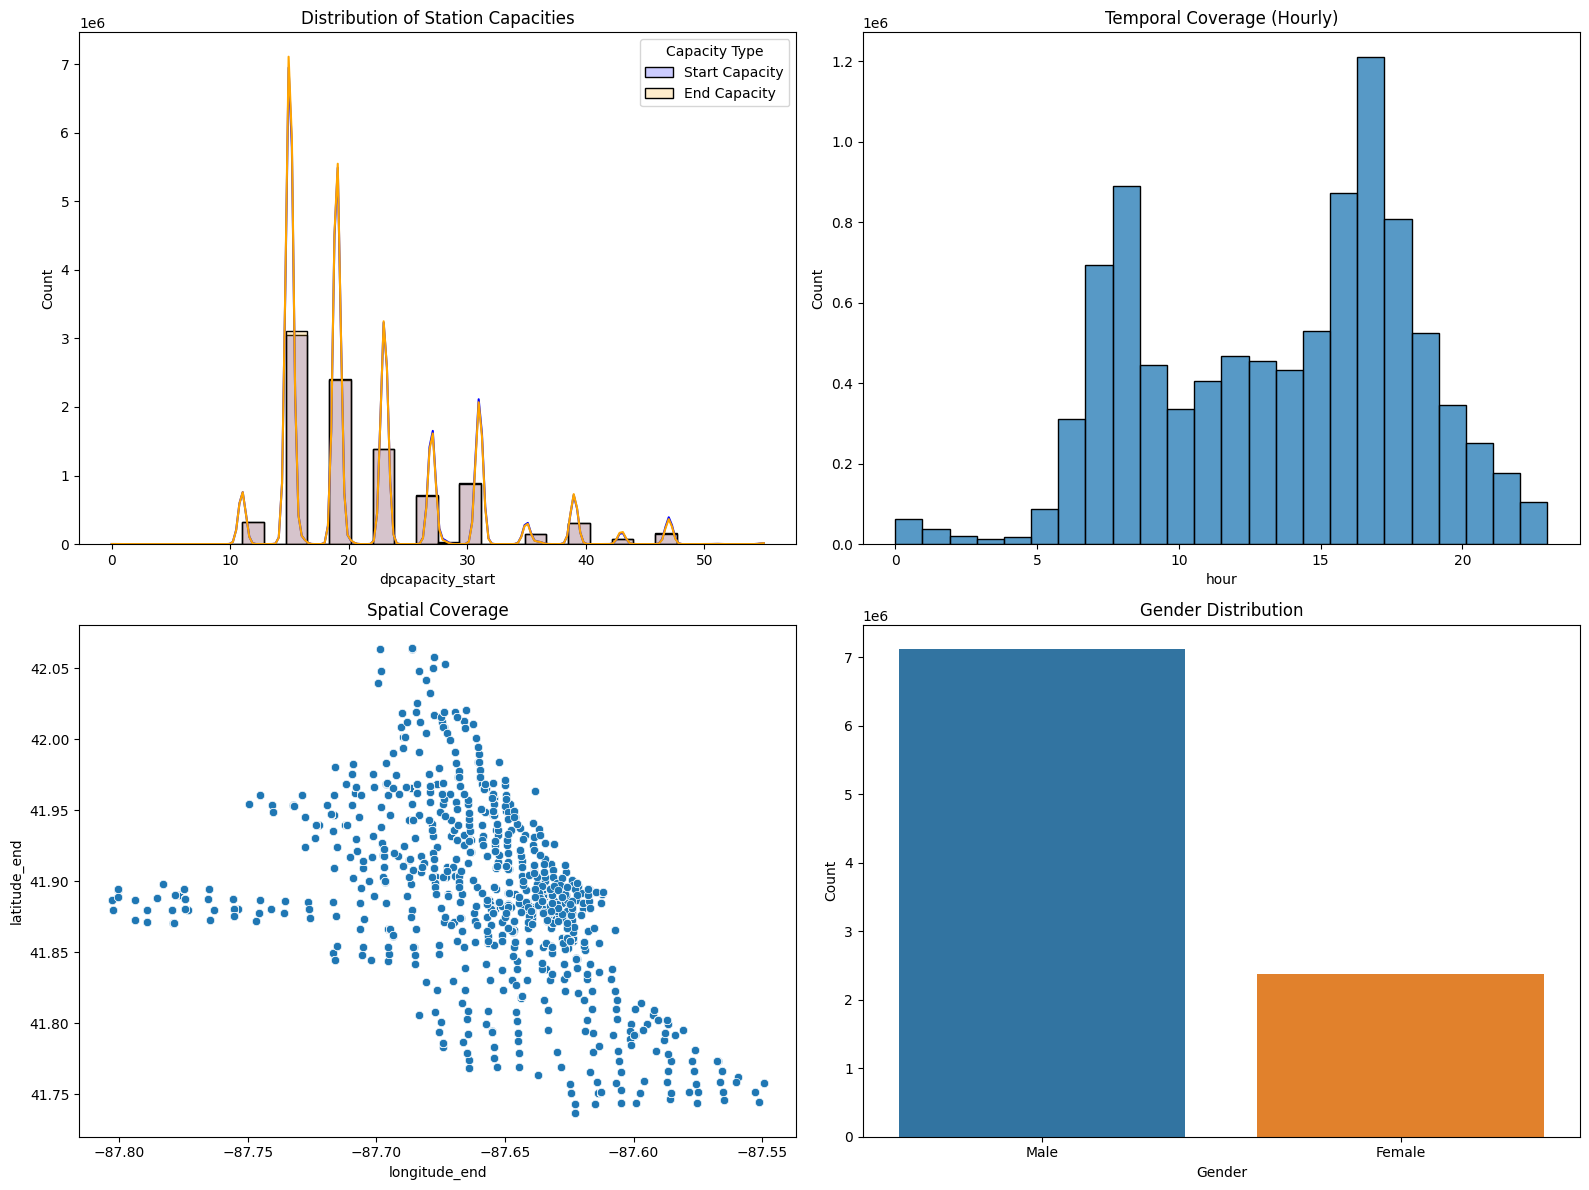

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Visualize distributions of 'dpcapacity_start' and 'dpcapacity_end' in a histogram
sns.histplot(bike_df['dpcapacity_start'], bins=30, kde=True, color='blue', label='Start Capacity', alpha=0.2, ax=axes[0, 0])
sns.histplot(bike_df['dpcapacity_end'], bins=30, kde=True, color='orange', label='End Capacity', alpha=0.2, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Station Capacities')
axes[0, 0].legend(title='Capacity Type')

# Check for gaps in temporal coverage
sns.histplot(bike_df['hour'], bins=24, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Temporal Coverage (Hourly)')

# Check for gaps in spatial coverage
sns.scatterplot(x='longitude_end', y='latitude_end', data=bike_df, ax=axes[1, 0])
axes[1, 0].set_title('Spatial Coverage')

# Check for biases in gender
sns.countplot(x='gender', data=bike_df, hue='gender', ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

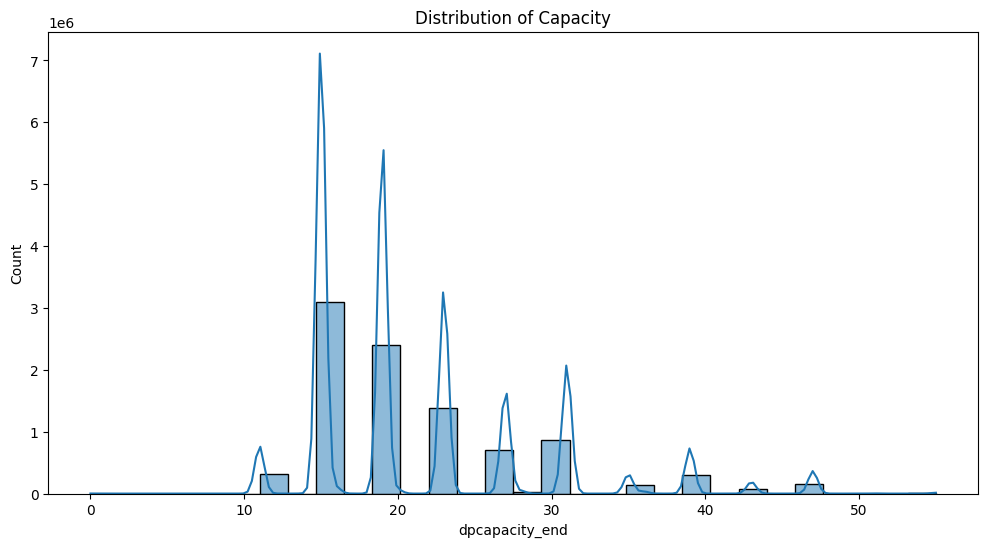

In [32]:
# Visualize distributions of key variables
plt.figure(figsize=(12, 6))
sns.histplot(bike_df['dpcapacity_end'], bins=30, kde=True)
plt.title('Distribution of Capacity')
plt.show()

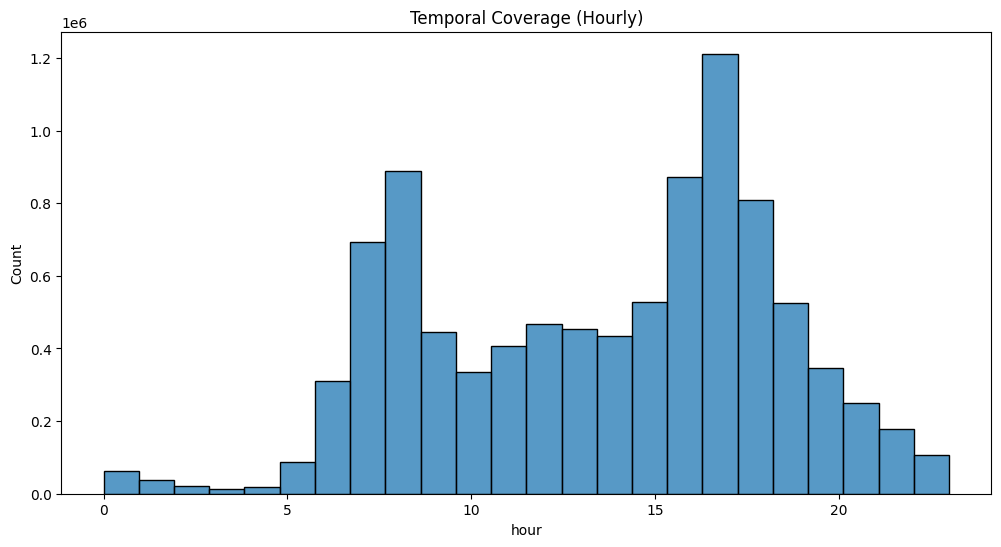

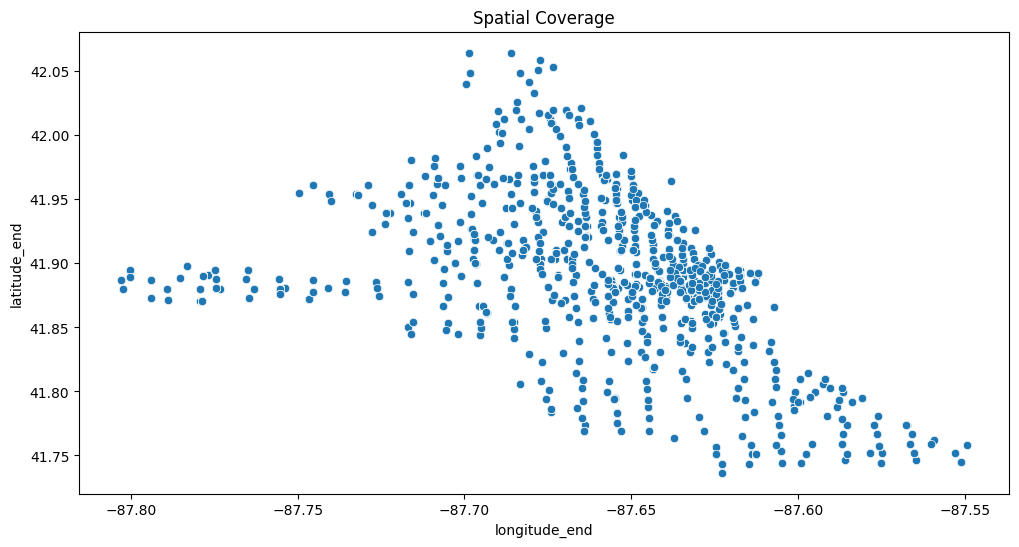

In [33]:
# Check for gaps in temporal coverage
plt.figure(figsize=(12, 6))
sns.histplot(bike_df['hour'], bins=24, kde=False)
plt.title('Temporal Coverage (Hourly)')
plt.show()

# Check for gaps in spatial coverage
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude_end', y='latitude_end', data=bike_df)
plt.title('Spatial Coverage')
plt.show()

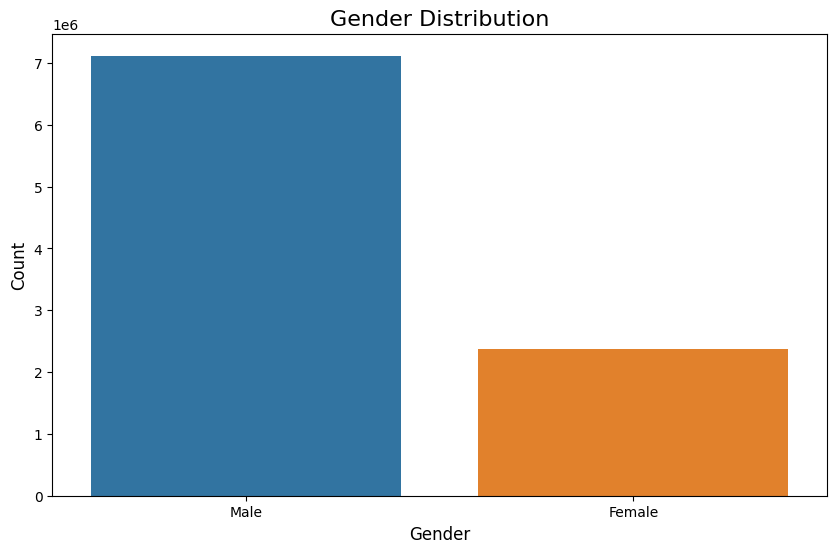

In [15]:
# # Check for biases in user types
# plt.figure(figsize=(12, 6))
# sns.countplot(x='usertype', data=bike_df)
# plt.title('User Type Distribution')
# plt.show()

# Check for biases in gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=bike_df, hue='gender')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [5]:
bike_df.usertype.value_counts()

usertype
Subscriber    9493780
Customer         1277
Dependent         178
Name: count, dtype: int64

In [6]:
bike_df.events.value_counts()

events
cloudy          8398501
clear            511819
rain or snow     432077
not clear         88159
tstorms           64143
unknown             536
Name: count, dtype: int64

In [7]:
bike_df.columns

Index(['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender',
       'starttime', 'stoptime', 'tripduration', 'temperature', 'events',
       'from_station_id', 'from_station_name', 'latitude_start',
       'longitude_start', 'dpcapacity_start', 'to_station_id',
       'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end'],
      dtype='object')

In [8]:
# Identify unique values for each column
bike_df.nunique(axis=0).sort_values()

gender                     2
usertype                   3
year                       4
events                     6
day                        7
month                     12
dpcapacity_end            20
dpcapacity_start          20
hour                      24
week                      53
temperature              150
from_station_id          586
to_station_id            586
from_station_name        656
to_station_name          656
latitude_start          1074
latitude_end            1074
longitude_end           1113
longitude_start         1113
tripduration            3481
stoptime             4472053
starttime            4508914
trip_id              9495188
dtype: int64

In [9]:
# Check for proportion of missing values for all columns
bike_df.isna().sum().sort_values(ascending=False)

trip_id              0
events               0
longitude_end        0
latitude_end         0
to_station_name      0
to_station_id        0
dpcapacity_start     0
longitude_start      0
latitude_start       0
from_station_name    0
from_station_id      0
temperature          0
year                 0
tripduration         0
stoptime             0
starttime            0
gender               0
usertype             0
hour                 0
day                  0
week                 0
month                0
dpcapacity_end       0
dtype: int64

In [10]:
bike_df.dtypes

trip_id                int64
year                   int64
month                  int64
week                   int64
day                    int64
hour                   int64
usertype              object
gender                object
starttime             object
stoptime              object
tripduration         float64
temperature          float64
events                object
from_station_id        int64
from_station_name     object
latitude_start       float64
longitude_start      float64
dpcapacity_start     float64
to_station_id          int64
to_station_name       object
latitude_end         float64
longitude_end        float64
dpcapacity_end       float64
dtype: object

In [11]:
summary_df2 = pd.DataFrame({'Column Name': bike_df.columns,
                           'Min Value': [bike_df[col].min() for col in bike_df.columns],
                           'Max Value': [bike_df[col].max() for col in bike_df.columns]})
display(summary_df2)

,Column Name,Min Value,Max Value
0,trip_id,1109427,17536701
1,year,2014,2017
2,month,1,12
3,week,1,53
4,day,0,6
5,hour,0,23
6,usertype,Customer,Subscriber
7,gender,Female,Male
8,starttime,2014-01-01 01:12:00,2017-12-31 23:58:00
9,stoptime,2014-01-01 01:18:00,2018-01-01 00:03:00


In [30]:
# Create timestamp for bike_df dataset
bike_df['timestamp'] = pd.to_datetime(
    bike_df['year'].astype(str) + '-1-1',  # Start from the first day of the year
    format='%Y-%m-%d'
) + pd.to_timedelta(
    (bike_df['week'] - 1) * 7, unit='D'  # Add weeks
) + pd.to_timedelta(
    (bike_df['day'] - 1), unit='D'  # Add days (1=Monday, 7=Sunday)
) + pd.to_timedelta(
    bike_df['hour'], unit='H'  # Add hours
)

# Adjust the day of the week to start from Monday
bike_df['timestamp'] = bike_df['timestamp'] - pd.to_timedelta(bike_df['timestamp'].dt.dayofweek, unit='D') + pd.to_timedelta(bike_df['day'] - 1, unit='D')

# Display the DataFrame with the new timestamp column
print(bike_df[['year', 'week', 'day', 'hour', 'timestamp']].head())

C:\Users\nixon\AppData\Local\Temp\ipykernel_24292\3982976446.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  ) + pd.to_timedelta(


   year  week  day  hour           timestamp
0  2014    27    0    23 2014-06-29 23:00:00
1  2014    27    0    23 2014-06-29 23:00:00
2  2014    27    0    23 2014-06-29 23:00:00
3  2014    27    0    23 2014-06-29 23:00:00
4  2014    27    0    23 2014-06-29 23:00:00


In [35]:
bike_df.dtypes

trip_id                       int64
year                          int64
month                         int64
week                          int64
day                           int64
hour                          int64
usertype                     object
gender                       object
starttime                    object
stoptime                     object
tripduration                float64
temperature                 float64
events                       object
from_station_id               int64
from_station_name            object
latitude_start              float64
longitude_start             float64
dpcapacity_start            float64
to_station_id                 int64
to_station_name              object
latitude_end                float64
longitude_end               float64
dpcapacity_end              float64
timestamp            datetime64[ns]
dtype: object

In [33]:
bike_df.sample(5)

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,timestamp
4585497,9435333,2016,5,18,3,19,Subscriber,Female,2016-05-05 19:49:00,2016-05-05 19:53:00,...,Milwaukee Ave & Wabansia Ave,41.912616,-87.681391,15.0,116,Western Ave & Winnebago Ave,41.915533,-87.687051,15.0,2016-04-27 19:00:00
6005212,12926858,2016,12,50,3,11,Subscriber,Male,2016-12-15 11:32:07,2016-12-15 11:38:32,...,Lake Park Ave & 56th St,41.793242,-87.587782,19.0,423,University Ave & 57th St,41.791478,-87.599861,19.0,2016-12-07 11:00:00
6409127,12346278,2016,10,41,4,19,Subscriber,Female,2016-10-14 19:41:24,2016-10-14 19:56:18,...,Streeter Dr & Grand Ave,41.892278,-87.612043,47.0,45,Michigan Ave & Congress Pkwy,41.876243,-87.624426,15.0,2016-10-13 19:00:00
8210574,16029428,2017,8,34,4,7,Subscriber,Female,2017-08-25 07:46:22,2017-08-25 08:09:00,...,Canal St & Adams St,41.879255,-87.639904,47.0,110,Dearborn St & Erie St,41.893992,-87.629318,23.0,2017-08-24 07:00:00
2325214,4862623,2015,4,16,1,15,Subscriber,Male,2015-04-14 15:46:00,2015-04-14 15:56:00,...,St. Clair St & Erie St,41.894448,-87.622663,19.0,44,State St & Randolph St,41.884730,-87.627734,27.0,2015-04-13 15:00:00


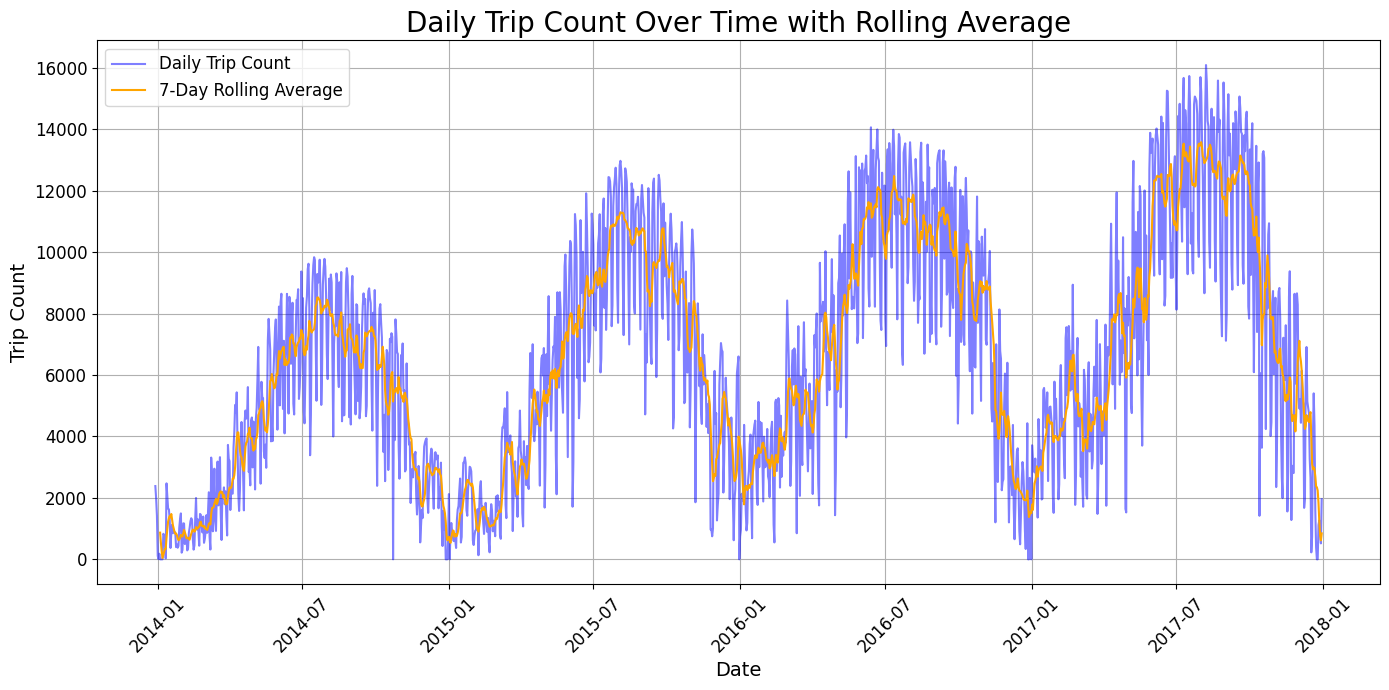

In [39]:
# # Ensure the timestamp column is in datetime format
# bike_df['timestamp'] = pd.to_datetime(bike_df['timestamp'])

# # Group by timestamp and count the number of trip_id
# trip_counts = bike_df.groupby('timestamp').size().reset_index(name='trip_count')

# # Create the line graph
# plt.figure(figsize=(14, 7))
# sns.lineplot(x='timestamp', y='trip_count', data=trip_counts)
# plt.title('Trip Count Over Time', fontsize=16)
# plt.xlabel('Timestamp', fontsize=12)
# plt.ylabel('Trip Count', fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Resample the data to daily counts
daily_trip_counts = bike_df.resample('D', on='timestamp').size().reset_index(name='trip_count')

# Calculate a 7-day rolling average
daily_trip_counts['rolling_avg'] = daily_trip_counts['trip_count'].rolling(window=7).mean()

# Create the line graph with rolling average and improved aesthetics
plt.figure(figsize=(14, 7))
sns.lineplot(x='timestamp', y='trip_count', data=daily_trip_counts, label='Daily Trip Count', alpha=0.5, color='blue')
sns.lineplot(x='timestamp', y='rolling_avg', data=daily_trip_counts, label='7-Day Rolling Average', color='orange')
plt.title('Daily Trip Count Over Time with Rolling Average', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Trip Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# # Improve date formatting
# plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

plt.show()

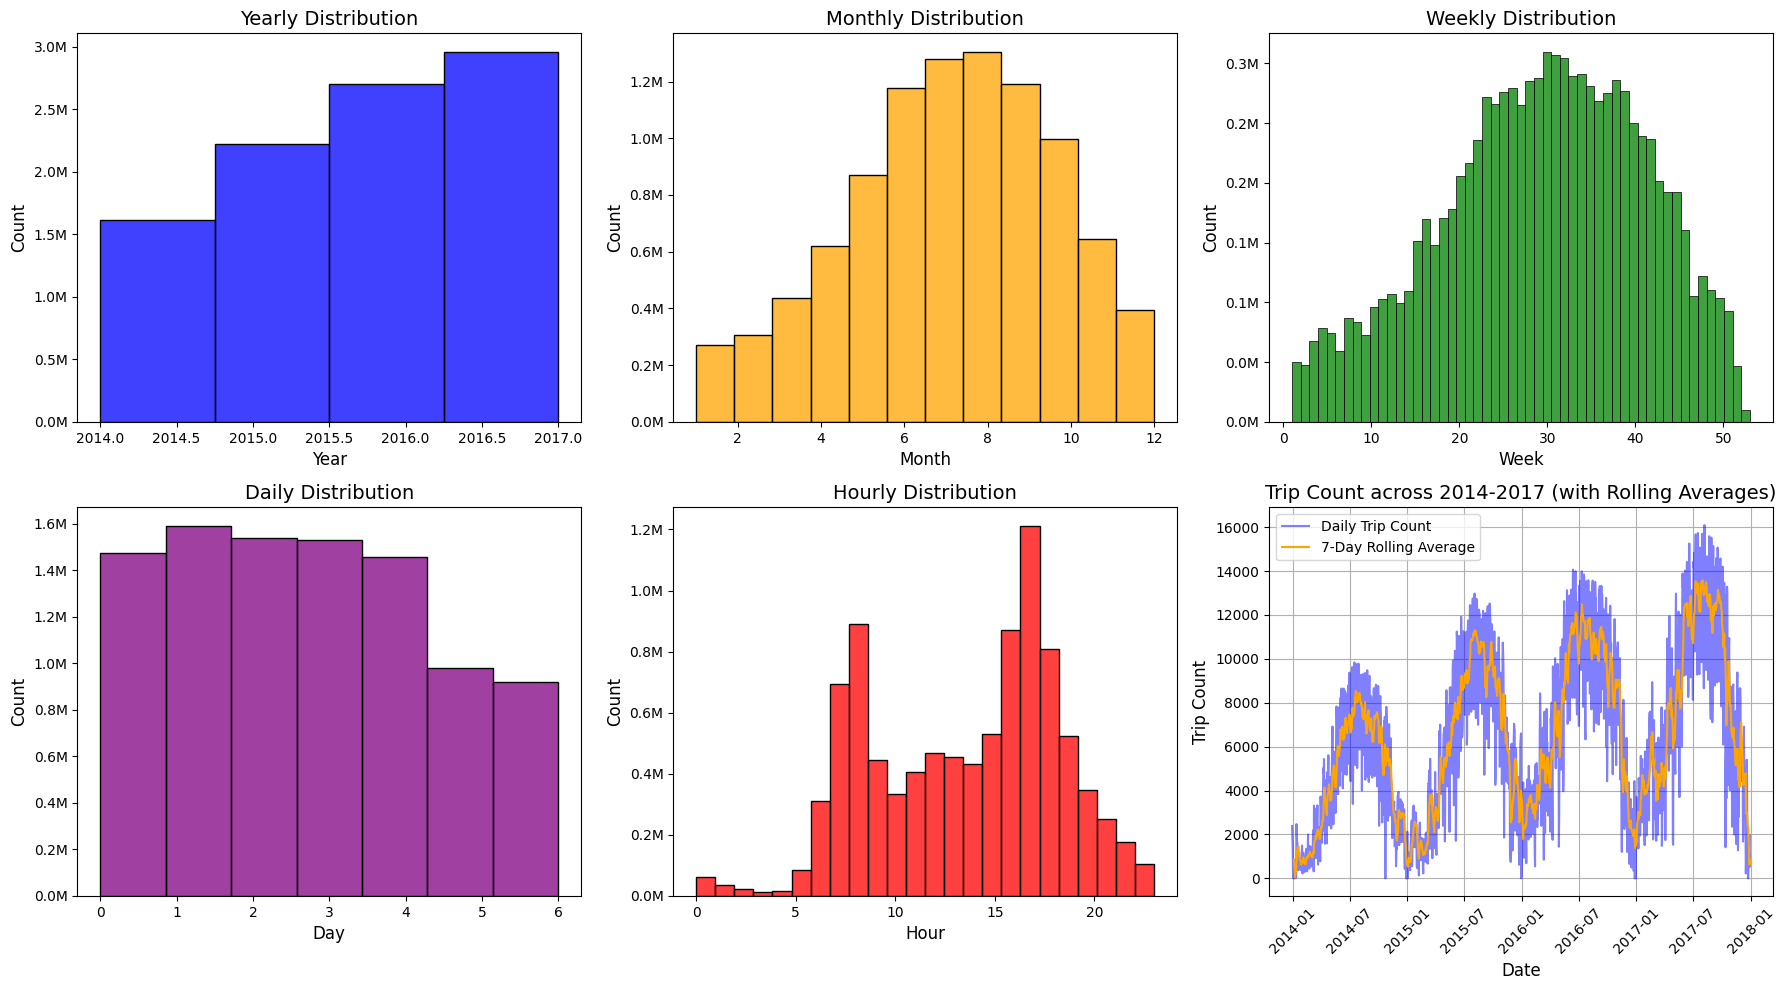

In [92]:
# Function to format y-axis labels
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

# Set a consistent color palette
sns.set_palette("Set2")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Visualize distributions
sns.histplot(bike_df['year'], ax=axes[0, 0], bins=4, color='blue', kde=False)
axes[0, 0].set_title('Yearly Distribution', fontsize=14)
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].yaxis.set_major_formatter(FuncFormatter(millions))

sns.histplot(bike_df['month'], ax=axes[0, 1], bins=12, color='orange', kde=False)
axes[0, 1].set_title('Monthly Distribution', fontsize=14)
axes[0, 1].set_xlabel('Month', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].yaxis.set_major_formatter(FuncFormatter(millions))

sns.histplot(bike_df['week'], ax=axes[0, 2], bins=53, color='green', kde=False)
axes[0, 2].set_title('Weekly Distribution', fontsize=14)
axes[0, 2].set_xlabel('Week', fontsize=12)
axes[0, 2].set_ylabel('Count', fontsize=12)
axes[0, 2].yaxis.set_major_formatter(FuncFormatter(millions))

sns.histplot(bike_df['day'], ax=axes[1, 0], bins=7, color='purple', kde=False)
axes[1, 0].set_title('Daily Distribution', fontsize=14)
axes[1, 0].set_xlabel('Day', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].yaxis.set_major_formatter(FuncFormatter(millions))

sns.histplot(bike_df['hour'], ax=axes[1, 1], bins=24, color='red', kde=False)
axes[1, 1].set_title('Hourly Distribution', fontsize=14)
axes[1, 1].set_xlabel('Hour', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)
axes[1, 1].yaxis.set_major_formatter(FuncFormatter(millions))


# Resample the data to daily counts
daily_trip_counts = bike_df.resample('D', on='timestamp').size().reset_index(name='trip_count')

# Calculate a 7-day rolling average
daily_trip_counts['rolling_avg'] = daily_trip_counts['trip_count'].rolling(window=7).mean()

# Create the line graph with rolling average and improved aesthetics in the sixth subplot
sns.lineplot(x='timestamp', y='trip_count', data=daily_trip_counts, label='Daily Trip Count', alpha=0.5, color='blue', ax=axes[1, 2])
sns.lineplot(x='timestamp', y='rolling_avg', data=daily_trip_counts, label='7-Day Rolling Average', color='orange', ax=axes[1, 2])
axes[1, 2].set_title('Trip Count across 2014-2017 (with Rolling Averages)', fontsize=14)
axes[1, 2].set_xlabel('Date', fontsize=12)
axes[1, 2].set_ylabel('Trip Count', fontsize=12)
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True)
axes[1, 2].legend(fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

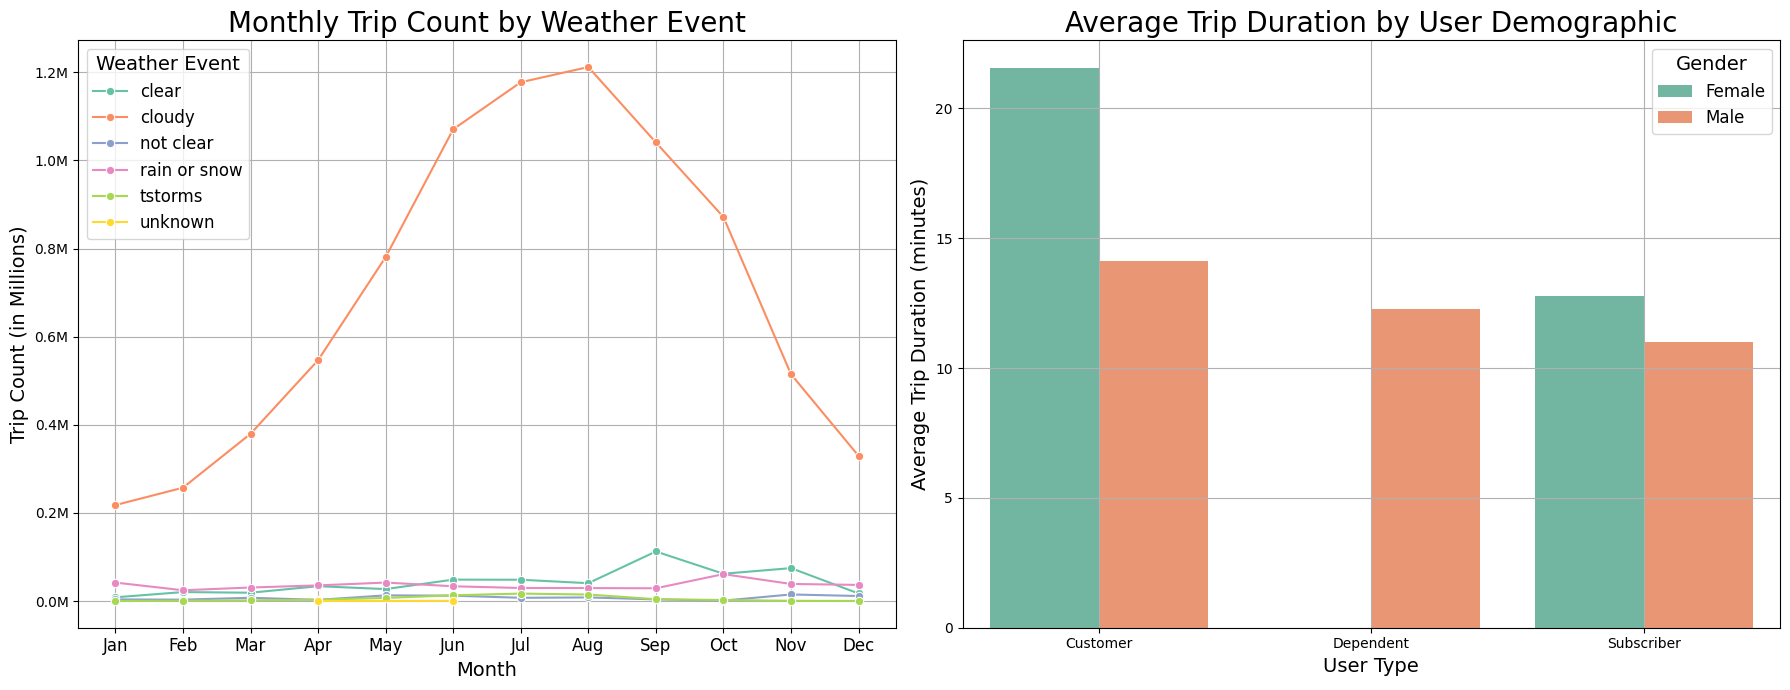

In [106]:
# Weather Impacts Analysis
weather_df = bike_df[['timestamp', 'trip_id', 'events']]
monthly_weather_trip_counts = bike_df.groupby(['events', 'month']).size().reset_index(name='trip_count')

# User Behavior Analysis
user_df = bike_df[['timestamp', 'trip_id', 'usertype', 'gender', 'tripduration']]
user_trip_behavior = user_df.groupby(['usertype', 'gender']).agg({'trip_id': 'count', 'tripduration': 'mean'}).reset_index()
user_trip_behavior.rename(columns={'trip_id': 'trip_count', 'tripduration': 'avg_trip_duration'}, inplace=True)

# Set a consistent color palette
sns.set_palette("Set2")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot monthly trends (Weather Impacts Analysis)
sns.lineplot(x='month', y='trip_count', hue='events', data=monthly_weather_trip_counts, palette='Set2', marker='o', ax=axes[0])
axes[0].set_title('Monthly Trip Count by Weather Event', fontsize=20)
axes[0].set_xlabel('Month', fontsize=14)
axes[0].set_ylabel('Trip Count (in Millions)', fontsize=14)
axes[0].yaxis.set_major_formatter(FuncFormatter(millions))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(month_names, fontsize=12)
axes[0].grid(True)
axes[0].legend(title='Weather Event', fontsize=12, title_fontsize=14)

# Plot user behavior analysis
sns.barplot(x='usertype', y='avg_trip_duration', hue='gender', data=user_trip_behavior, palette='Set2', ax=axes[1])
axes[1].set_title('Average Trip Duration by User Demographic', fontsize=20)
axes[1].set_xlabel('User Type', fontsize=14)
axes[1].set_ylabel('Average Trip Duration (minutes)', fontsize=14)
axes[1].grid(True)
axes[1].legend(title='Gender', fontsize=12, title_fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

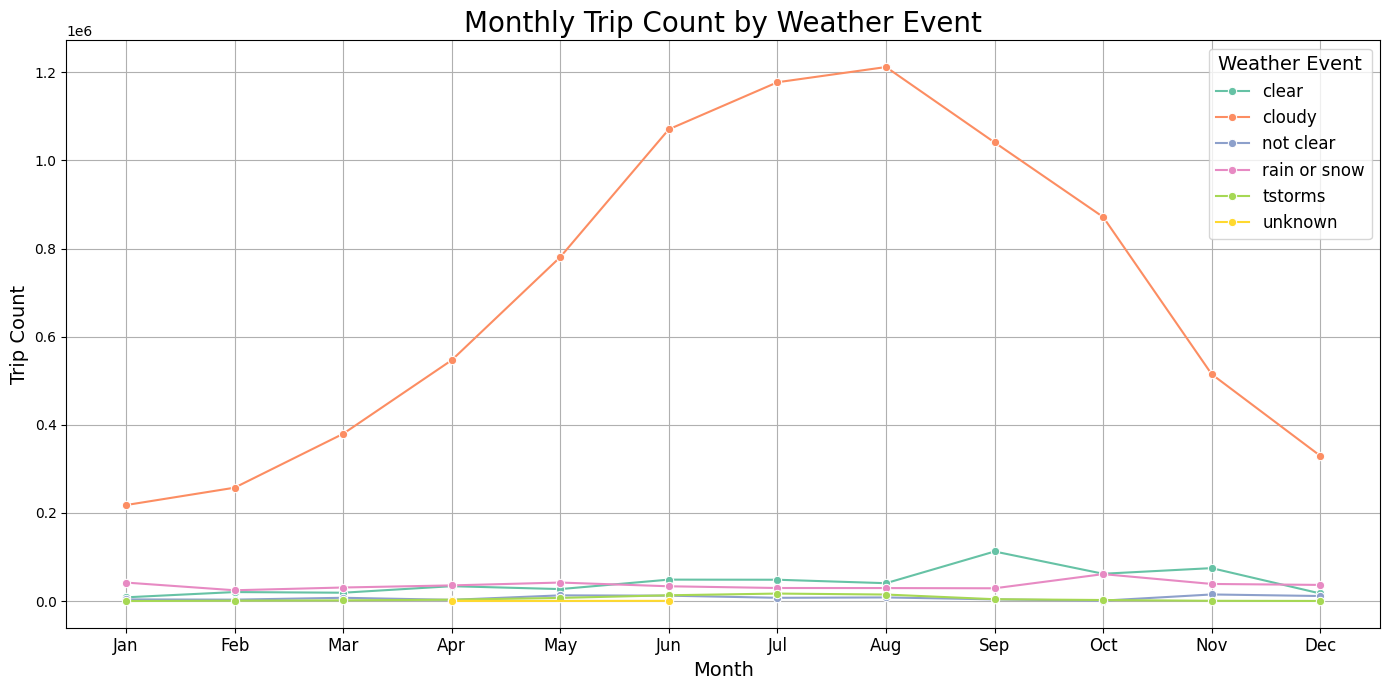

In [ ]:
# Group by weather event and month, and count the number of trips
monthly_weather_trip_counts = bike_df.groupby(['events', 'month']).size().reset_index(name='trip_count')

# Set a consistent color palette
sns.set_palette("Set2")

# Plot monthly trends
plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='trip_count', hue='events', data=monthly_weather_trip_counts, palette='Set2', marker='o')

# Enhance titles and labels
plt.title('Monthly Trip Count by Weather Event', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Trip Count', fontsize=14)

# Improve date formatting
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names, fontsize=12)

# Add gridlines
plt.grid(True)

# Add legend
plt.legend(title='Weather Event', fontsize=12, title_fontsize=14)
plt.yaxis.set_major_formatter(FuncFormatter(millions))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

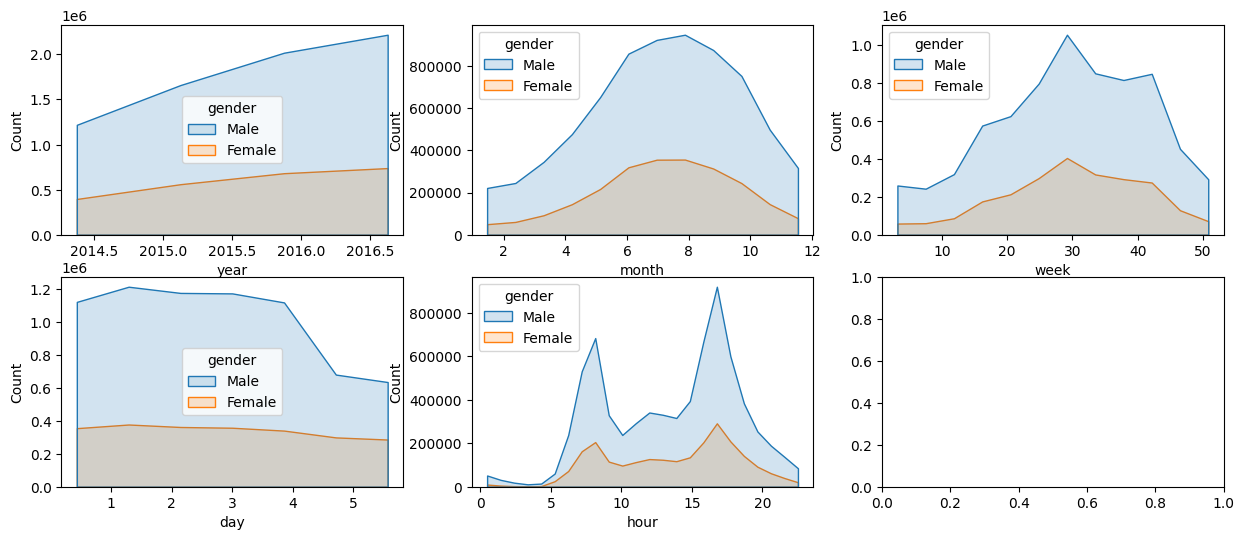

In [13]:
# Insights: Proportionally females are more likely to use the bike service on weekends, moreover
# during the warmer months, the proportion of females using the service is higher. The male proportion
# is higher during the week and during the colder months.
fig, axes = plt.subplots(2,3, figsize=(15,6))
sns.histplot(data=bike_df, x="year", ax=axes[0,0], bins=4, hue="gender", alpha=0.2, element="poly")
sns.histplot(data=bike_df, x="month", ax=axes[0,1], bins=12, hue="gender", alpha=0.2, element="poly")
sns.histplot(data=bike_df, x="week", ax=axes[0,2], bins=12, hue="gender", alpha=0.2, element="poly")
sns.histplot(data=bike_df, x="day", ax=axes[1,0], bins=7, hue="gender", alpha=0.2, element="poly")
sns.histplot(data=bike_df, x="hour", ax=axes[1,1], bins=24, hue="gender", alpha=0.2, element="poly")
plt.show()

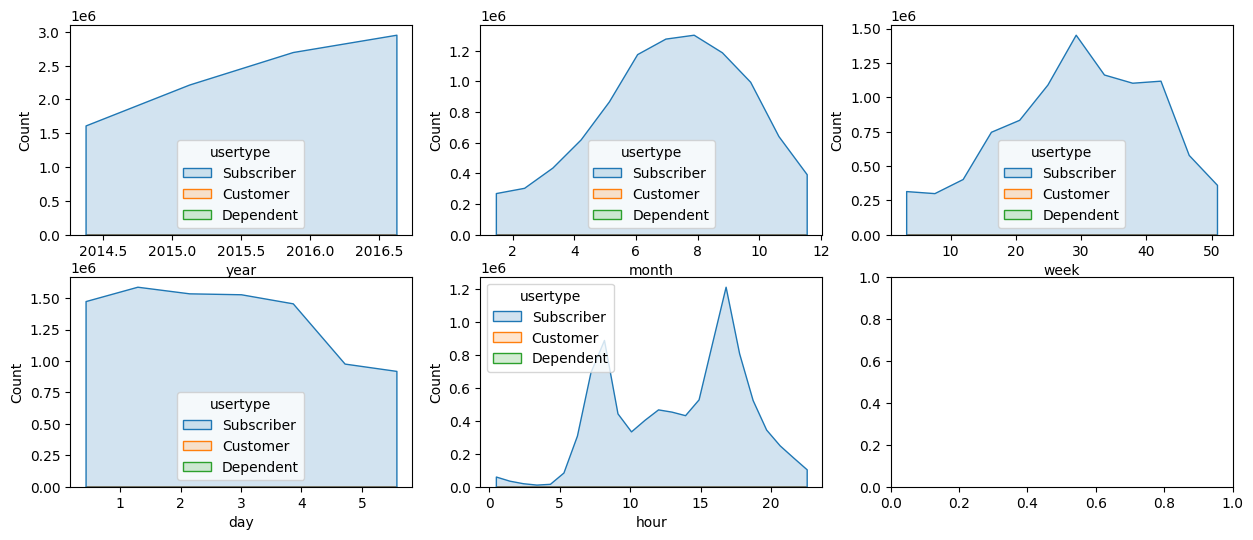

In [14]:
# Sample size for customer and dependent is too small to draw any conclusions.
fig, axes = plt.subplots(2,3, figsize=(15,6))
sns.histplot(data=bike_df, x="year", ax=axes[0,0], bins=4, hue="usertype", alpha=0.2, element="poly")
sns.histplot(data=bike_df, x="month", ax=axes[0,1], bins=12, hue="usertype", alpha=0.2, element="poly")
sns.histplot(data=bike_df, x="week", ax=axes[0,2], bins=12, hue="usertype", alpha=0.2, element="poly")
sns.histplot(data=bike_df, x="day", ax=axes[1,0], bins=7, hue="usertype", alpha=0.2, element="poly")
sns.histplot(data=bike_df, x="hour", ax=axes[1,1], bins=24, hue="usertype", alpha=0.2, element="poly")
plt.show()

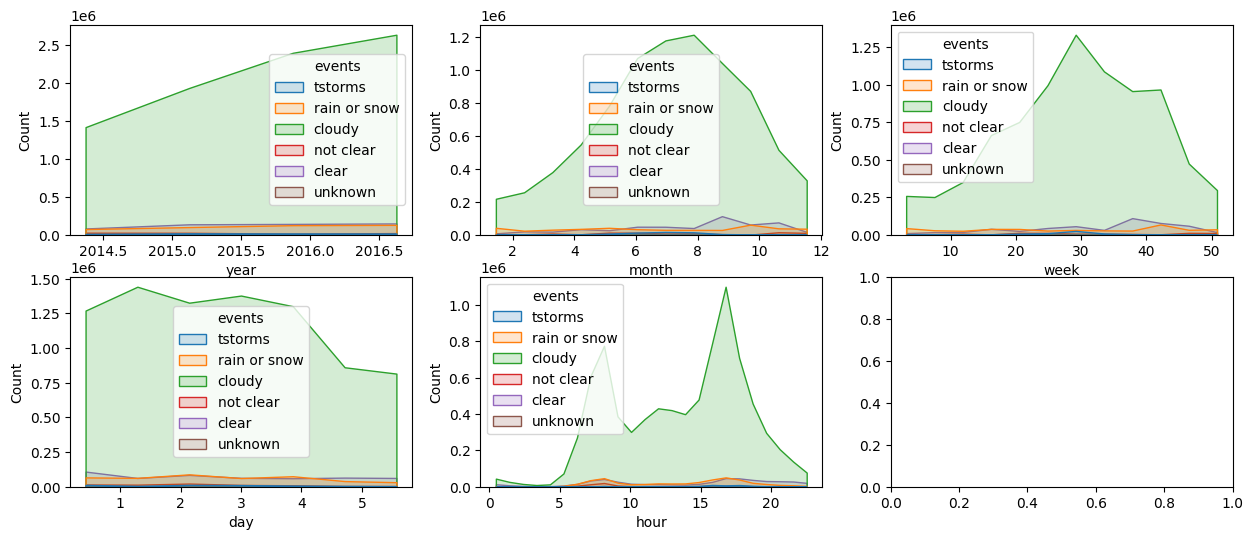

In [15]:
fig, axes = plt.subplots(2,3, figsize=(15,6))
sns.histplot(data=bike_df, x="year", ax=axes[0,0], bins=4, hue="events", alpha=0.2, element="poly")
sns.histplot(data=bike_df, x="month", ax=axes[0,1], bins=12, hue="events", alpha=0.2, element="poly")
sns.histplot(data=bike_df, x="week", ax=axes[0,2], bins=12, hue="events", alpha=0.2, element="poly")
sns.histplot(data=bike_df, x="day", ax=axes[1,0], bins=7, hue="events", alpha=0.2, element="poly")
sns.histplot(data=bike_df, x="hour", ax=axes[1,1], bins=24, hue="events", alpha=0.2, element="poly")
plt.show()

Text(0.5, 1.0, 'Type of Customers')

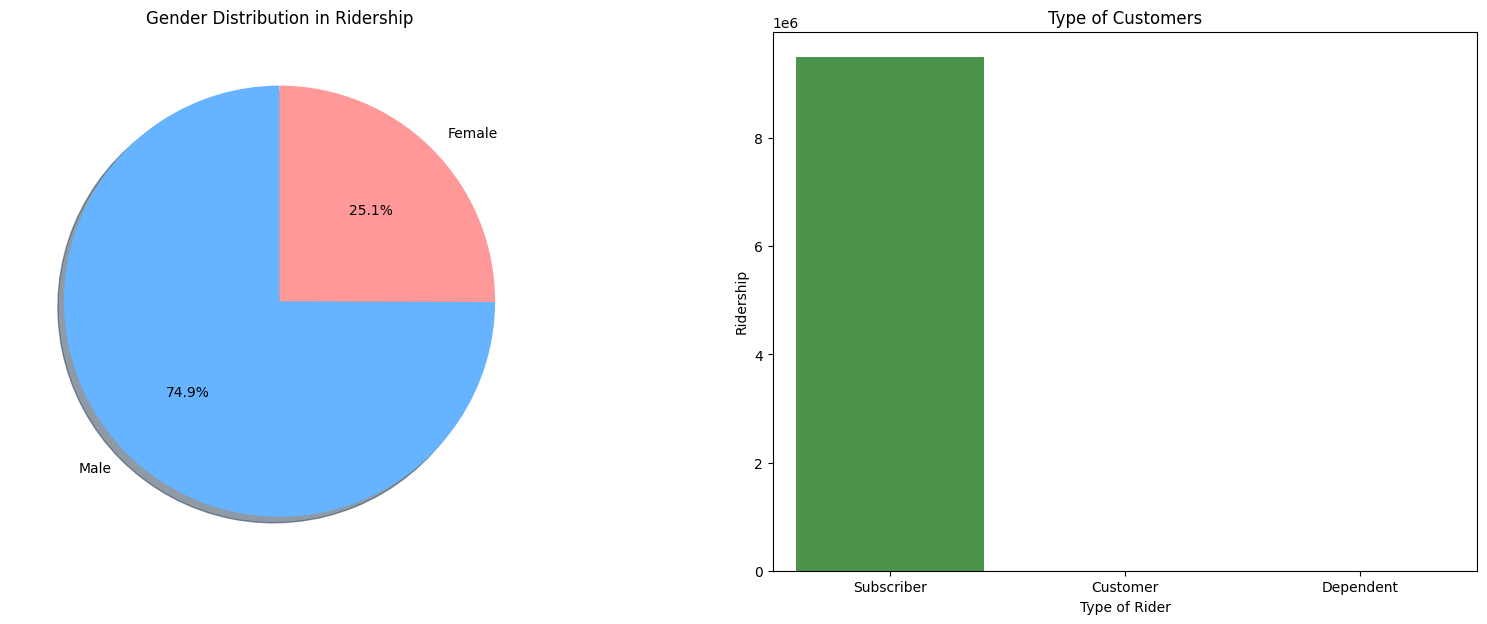

In [16]:
f, ax = plt.subplots(1,2, figsize=(20,7))
colors = ['#66b3ff','#ff9999']
pie = ax[0].pie(list(bike_df['gender'].value_counts()), 
                   labels=list(bike_df.gender.unique()),
                  autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
count = sns.countplot(x='usertype', data=bike_df, ax=ax[1], color='green', alpha=0.75)
ax[0].set_title("Gender Distribution in Ridership")
ax[1].set_xlabel("Type of Rider")
ax[1].set_ylabel("Ridership")
ax[1].set_title("Type of Customers")

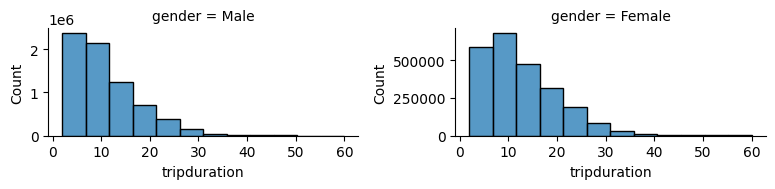

In [17]:
g = sns.FacetGrid(bike_df, col="gender", col_wrap=4, sharey=False, height=2, aspect=2)
g.map(sns.histplot, "tripduration", binwidth=5)
plt.show()

In [18]:
print(f"Max longitude: {bike_df.longitude_start.max()}")
print(f"Min longitude: {bike_df.longitude_start.min()}")
print(f"Max latitude: {bike_df.latitude_start.max()}")
print(f"Min latitude: {bike_df.latitude_start.min()}")

Max longitude: -87.549386
Min longitude: -87.80287
Max latitude: 42.064313
Min latitude: 41.736646


In [24]:
bike_df.shape

(9495235, 23)

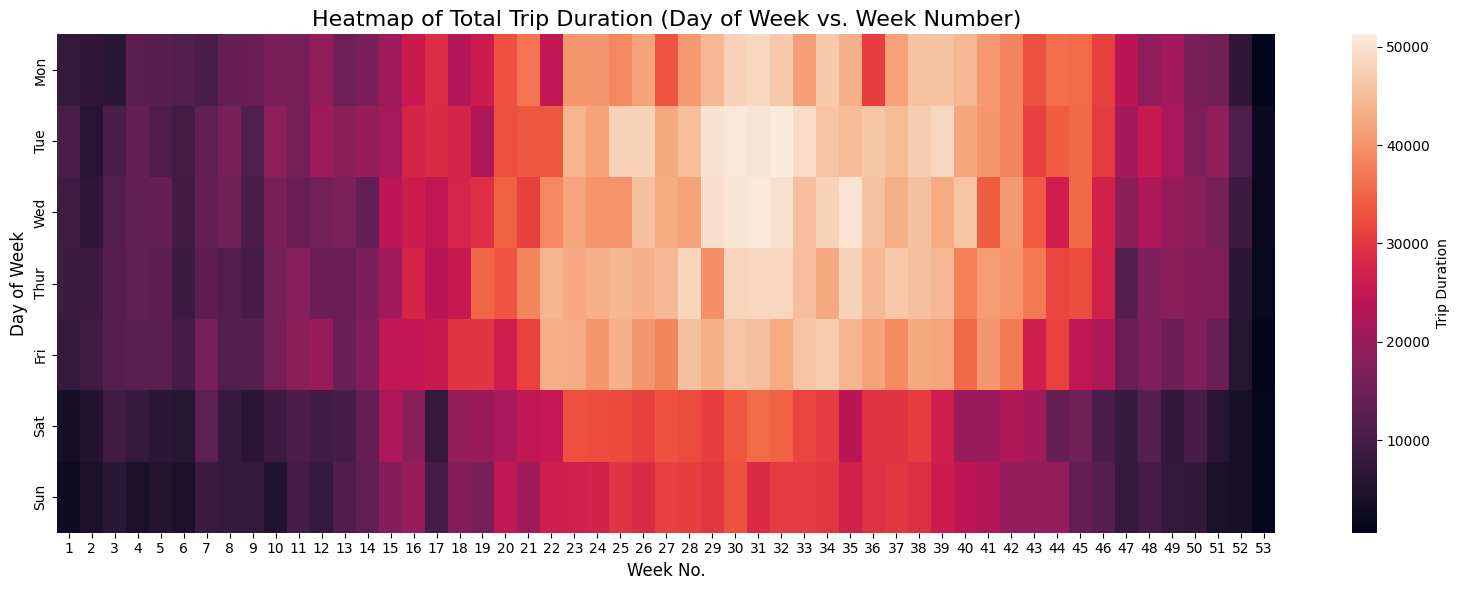

In [100]:
# heatmap of trip count vs. (weekday and week no.)
fig, ax = plt.subplots(figsize=(16, 6))
tmp = bike_df[['day', 'week', 'tripduration']].groupby(['day', 'week']).count().reset_index()
pivots = tmp.pivot(index='day', columns='week', values='tripduration')
sns.heatmap(pivots, cbar_kws={'label': 'Trip Duration'})
ax.set_title('Heatmap of Total Trip Duration (Day of Week vs. Week Number)', fontsize=16)
ax.set_xlabel('Week No.', fontsize=12)
ax.set_ylabel('Day of Week', fontsize=12)
ax.set_yticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), fontsize=10)
plt.tight_layout()
plt.show()

In [105]:
filtered_bike_df_3 = bike_df[(bike_df['week'] == 53) & (bike_df['day'] == 0)]
display(filtered_bike_df_3)

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,timestamp
3311941,8538252,2015,12,53,0,23,Subscriber,Male,2015-12-28 23:59:00,2015-12-29 00:08:00,...,Logan Blvd & Elston Ave,41.930584,-87.685126,19.0,260,Kedzie Ave & Milwaukee Ave,41.929567,-87.707857,19.0,2015-12-27 23:00:00
3311942,8538251,2015,12,53,0,23,Subscriber,Male,2015-12-28 23:53:00,2015-12-29 00:03:00,...,Clark St & Winnemac Ave,41.973385,-87.668365,19.0,306,Sheridan Rd & Buena Ave,41.958400,-87.654230,15.0,2015-12-27 23:00:00
3311943,8538250,2015,12,53,0,23,Subscriber,Male,2015-12-28 23:47:00,2015-12-28 23:55:00,...,Blue Island Ave & 18th St,41.857556,-87.661535,15.0,135,Halsted St & 21st St,41.853780,-87.646650,11.0,2015-12-27 23:00:00
3311944,8538249,2015,12,53,0,23,Subscriber,Male,2015-12-28 23:41:00,2015-12-28 23:48:00,...,Sheffield Ave & Fullerton Ave,41.925602,-87.653708,15.0,166,Ashland Ave & Wrightwood Ave,41.928830,-87.668507,15.0,2015-12-27 23:00:00
3311945,8538247,2015,12,53,0,23,Subscriber,Male,2015-12-28 23:36:00,2015-12-28 23:57:00,...,Sheffield Ave & Wrightwood Ave,41.928712,-87.653833,19.0,116,Western Ave & Winnebago Ave,41.915533,-87.687051,15.0,2015-12-27 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312537,8536884,2015,12,53,0,0,Subscriber,Male,2015-12-28 00:17:00,2015-12-28 00:24:00,...,California Ave & 21st St,41.854016,-87.695445,15.0,442,California Ave & 23rd Pl,41.849110,-87.695140,15.0,2015-12-27 00:00:00
3312538,8536881,2015,12,53,0,0,Subscriber,Male,2015-12-28 00:09:00,2015-12-28 00:13:00,...,Sheridan Rd & Montrose Ave,41.961670,-87.654640,15.0,323,Sheridan Rd & Lawrence Ave,41.969517,-87.654691,15.0,2015-12-27 00:00:00
3312539,8536880,2015,12,53,0,0,Subscriber,Male,2015-12-28 00:08:00,2015-12-28 00:29:00,...,Seeley Ave & Roscoe St,41.943403,-87.679618,11.0,300,Broadway & Barry Ave,41.937725,-87.644095,19.0,2015-12-27 00:00:00
3312540,8536879,2015,12,53,0,0,Subscriber,Male,2015-12-28 00:04:00,2015-12-28 00:13:00,...,May St & Fulton St,41.886773,-87.656001,15.0,164,Franklin St & Lake St,41.885837,-87.635500,23.0,2015-12-27 00:00:00


In [103]:
display(tmp.sort_values(by='tripduration', ascending=False))

,day,week,tripduration
84,1,32,51252
82,1,30,51041
136,2,31,50950
135,2,30,50310
83,1,31,50090
...,...,...,...
211,3,53,1746
317,5,53,1282
370,6,53,1269
264,4,53,830


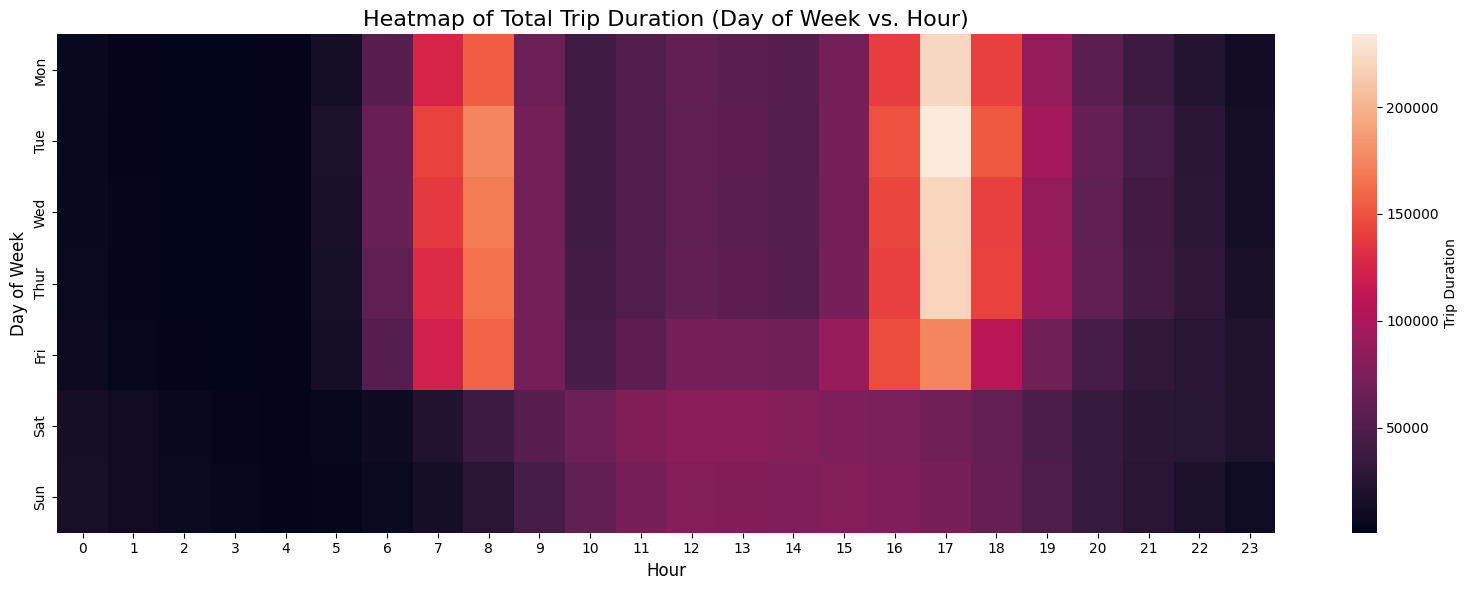

In [101]:
# heatmap of trip count vs. (day and hour)
fig, ax = plt.subplots(figsize=(16, 6))
tmp_2 = bike_df[['day', 'hour', 'tripduration']].groupby(['day', 'hour']).count().reset_index()
pivots = tmp_2.pivot(index='day', columns='hour', values='tripduration')
sns.heatmap(pivots, cbar_kws={'label': 'Trip Duration'})
ax.set_title('Heatmap of Total Trip Duration (Day of Week vs. Hour)', fontsize=16)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Day of Week', fontsize=12)
ax.set_yticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), fontsize=10)
plt.tight_layout()
plt.show()

In [47]:
### Week with optimal bike trip counts is determined to be week 31 of 2017
# Filter the DataFrame to just week 31 of 2017
filtered_bike_df = bike_df[(bike_df['year'] == 2017) & (bike_df['week'] == 31)]

# Display the filtered DataFrame
filtered_bike_df.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,timestamp
8454398,15635063,2017,8,31,6,23,Subscriber,Male,2017-08-06 23:58:47,2017-08-07 00:10:08,...,LaSalle St & Jackson Blvd,41.878170,-87.631985,35.0,273,Michigan Ave & 18th St,41.857813,-87.624550,23.0,2017-08-05 23:00:00
8454399,15635062,2017,8,31,6,23,Subscriber,Male,2017-08-06 23:58:25,2017-08-07 00:15:41,...,Green St & Randolph St,41.883668,-87.648670,15.0,143,Sedgwick St & Webster Ave,41.922167,-87.638888,15.0,2017-08-05 23:00:00
8454400,15635060,2017,8,31,6,23,Subscriber,Female,2017-08-06 23:57:45,2017-08-07 00:13:02,...,Wells St & Concord Ln,41.912133,-87.634656,19.0,332,Halsted St & Diversey Pkwy,41.933666,-87.648959,19.0,2017-08-05 23:00:00
8454401,15635059,2017,8,31,6,23,Subscriber,Male,2017-08-06 23:57:39,2017-08-07 00:19:59,...,St. Clair St & Erie St,41.894448,-87.622663,19.0,296,Broadway & Belmont Ave,41.940106,-87.645451,19.0,2017-08-05 23:00:00
8454402,15635055,2017,8,31,6,23,Subscriber,Male,2017-08-06 23:56:53,2017-08-07 00:00:09,...,Western Ave & Leland Ave,41.966555,-87.688487,19.0,242,Damen Ave & Leland Ave,41.967094,-87.679028,15.0,2017-08-05 23:00:00


In [94]:
filtered_bike_df_2 = bike_df[(bike_df['week'] == 31)]

In [95]:
filtered_bike_df_2.shape

(307327, 24)

In [48]:
# filtered_bike_df.to_csv('filtered_data.csv', index=False)

In [ ]:
# Create a base map centered at the approximate midpoint of the latitude and longitude ranges
center_lat = (filtered_bike_df['latitude_start'].mean() + filtered_bike_df['latitude_end'].mean()) / 2
center_lon = (filtered_bike_df['longitude_start'].mean() + filtered_bike_df['longitude_end'].mean()) / 2
bike_map = fm.Map(location=[center_lat, center_lon], zoom_start=12)

# Add routes to the map
for _, row in filtered_bike_df.iterrows():
    fm.PolyLine(
        locations=[
            (row['latitude_start'], row['longitude_start']),
            (row['latitude_end'], row['longitude_end'])
        ],
        color='blue',
        weight=2.5,
        opacity=0.7
    ).add_to(bike_map)

# Save the map as an HTML file
map_file_path = 'bike_routes_map.html'
bike_map.save(map_file_path)

'bike_routes_map.html'

In [66]:
from folium.plugins import HeatMap

# Step 2: Parse datetime and categorize by weekdays/weekends
filtered_bike_df['starttime'] = pd.to_datetime(filtered_bike_df['starttime'])
filtered_bike_df['day_of_week'] = filtered_bike_df['starttime'].dt.day_name()  # Extract day of the week
filtered_bike_df['is_weekend'] = filtered_bike_df['day_of_week'].isin(['Saturday', 'Sunday'])

# Step 3: Aggregate data by coordinates and weekday/weekend
weekday_data = filtered_bike_df[~filtered_bike_df['is_weekend']].groupby(['latitude_start', 'longitude_start']).size().reset_index(name='frequency')
weekend_data = filtered_bike_df[filtered_bike_df['is_weekend']].groupby(['latitude_start', 'longitude_start']).size().reset_index(name='frequency')

# Step 4: Create a base map
center_lat, center_lon = filtered_bike_df['latitude_start'].mean(), filtered_bike_df['longitude_start'].mean()
base_map_weekday = fm.Map(location=[center_lat, center_lon], zoom_start=12)
base_map_weekend = fm.Map(location=[center_lat, center_lon], zoom_start=12)

# Step 5: Add heatmap for weekdays
HeatMap(
    data=weekday_data[['latitude_start', 'longitude_start', 'frequency']].values.tolist(),
    radius=10,  # Adjust radius for heat intensity
    max_zoom=13
).add_to(base_map_weekday)

# Step 6: Add heatmap for weekends
HeatMap(
    data=weekend_data[['latitude_start', 'longitude_start', 'frequency']].values.tolist(),
    radius=10,
    max_zoom=13
).add_to(base_map_weekend)

# Save the maps
base_map_weekday.save('weekday_heatmap.html')
base_map_weekend.save('weekend_heatmap.html')

C:\Users\nixon\AppData\Local\Temp\ipykernel_24292\1336326476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bike_df['starttime'] = pd.to_datetime(filtered_bike_df['starttime'])
C:\Users\nixon\AppData\Local\Temp\ipykernel_24292\1336326476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bike_df['day_of_week'] = filtered_bike_df['starttime'].dt.day_name()  # Extract day of the week
C:\Users\nixon\AppData\Local\Temp\ipykernel_24292\1336326476.py:6: SettingWithCopyWarning: 
A value is 

In [68]:
import pandas as pd
import folium
from folium import PolyLine

# Step 2: Parse datetime and categorize weekdays/weekends
filtered_bike_df['starttime'] = pd.to_datetime(filtered_bike_df['starttime'])
filtered_bike_df['day_of_week'] = filtered_bike_df['starttime'].dt.day_name()
filtered_bike_df['is_weekend'] = filtered_bike_df['day_of_week'].isin(['Saturday', 'Sunday'])

# Step 3: Aggregate trips by origin-destination pairs
flow_data = filtered_bike_df.groupby(
    ['latitude_start', 'longitude_start', 'latitude_end', 'longitude_end', 'is_weekend']
).size().reset_index(name='trip_count')

# Step 4: Create a base map
center_lat, center_lon = filtered_bike_df['latitude_start'].mean(), filtered_bike_df['longitude_start'].mean()
flow_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Step 5: Add flow lines for weekdays and weekends
for _, row in flow_data.iterrows():
    color = 'blue' if not row['is_weekend'] else 'red'  # Blue for weekdays, red for weekends
    PolyLine(
        locations=[
            (row['latitude_start'], row['longitude_start']),
            (row['latitude_end'], row['longitude_end'])
        ],
        color=color,
        weight=1 + row['trip_count'] / 100,  # Scale thickness by trip count
        opacity=0.7
    ).add_to(flow_map)

# Step 6: Save the map
flow_map.save('bike_trip_flow_map.html')

C:\Users\nixon\AppData\Local\Temp\ipykernel_24292\1369468753.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bike_df['starttime'] = pd.to_datetime(filtered_bike_df['starttime'])
C:\Users\nixon\AppData\Local\Temp\ipykernel_24292\1369468753.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bike_df['day_of_week'] = filtered_bike_df['starttime'].dt.day_name()
C:\Users\nixon\AppData\Local\Temp\ipykernel_24292\1369468753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [91]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Parse datetime for filtering weekdays and weekends
filtered_bike_df['starttime'] = pd.to_datetime(filtered_bike_df['starttime'])
filtered_bike_df['day_of_week'] = filtered_bike_df['starttime'].dt.day_name()
filtered_bike_df['is_weekend'] = filtered_bike_df['day_of_week'].isin(['Saturday', 'Sunday'])

# Aggregate data for pickups on weekdays and weekends
weekday_pickups = filtered_bike_df[~filtered_bike_df['is_weekend']].groupby(['latitude_start', 'longitude_start']).size().reset_index(name='trip_count')
weekend_pickups = filtered_bike_df[filtered_bike_df['is_weekend']].groupby(['latitude_start', 'longitude_start']).size().reset_index(name='trip_count')

# Create a base map
center_lat, center_lon = filtered_bike_df['latitude_start'].mean(), filtered_bike_df['longitude_start'].mean()
weekday_vs_weekend_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# # Add heatmap for weekday pickups
# HeatMap(
#     data=weekday_pickups[['latitude_start', 'longitude_start', 'trip_count']].values.tolist(),
#     name="Weekday Pickups",
#     radius=15,
#     blur=10,
#     max_zoom=13,
#     gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'},
#     opacity=0.5  # Slightly reduced transparency
# ).add_to(weekday_vs_weekend_map)

# Add heatmap for weekend pickups
HeatMap(
    data=weekend_pickups[['latitude_start', 'longitude_start', 'trip_count']].values.tolist(),
    name="Weekend Pickups",
    radius=15,
    blur=10,
    max_zoom=13,
    gradient={0.4: 'purple', 0.65: 'orange', 1: 'red'},
    opacity=0.5  # Slightly reduced transparency
).add_to(weekday_vs_weekend_map)

# Add layer control for toggling
folium.LayerControl().add_to(weekday_vs_weekend_map)

# Save the map
weekday_vs_weekend_map_path = 'spatial_heatmap_weekends.html'
weekday_vs_weekend_map.save(weekday_vs_weekend_map_path)

weekday_vs_weekend_map_path


C:\Users\nixon\AppData\Local\Temp\ipykernel_24292\1231733659.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bike_df['starttime'] = pd.to_datetime(filtered_bike_df['starttime'])
C:\Users\nixon\AppData\Local\Temp\ipykernel_24292\1231733659.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bike_df['day_of_week'] = filtered_bike_df['starttime'].dt.day_name()
C:\Users\nixon\AppData\Local\Temp\ipykernel_24292\1231733659.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy 

'spatial_heatmap_weekends.html'